In [31]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.6 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 4.6 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.1 MB 4.3 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 4.2 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 4.1 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.1 MB 4.1 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [35]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data=pd.read_csv("data.csv")

EDA

In [21]:
data.columns

Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')

In [22]:
data.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,113799.0,NaN
1,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2364361.0,NaN
2,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1244684.0,NaN
3,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,479236.0,NaN
4,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,193167.0,NaN


In [23]:
data.tail()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
18380,NaN,tv,Drama,2025.0,NaN,NaN,NaN,NaN
18381,Icebreaker,tv,Thriller,2025.0,tt31795533,6.7,36.0,NaN
18382,NaN,tv,"Talk, Documentary",2014.0,NaN,NaN,NaN,NaN
18383,Novelette Is Trying,tv,Comedy,2025.0,tt33396141,NaN,NaN,NaN
18384,NaN,tv,"Animation, Kids",1966.0,NaN,NaN,NaN,NaN


In [24]:
data.isna().sum()

title                   583
type                      0
genres                  675
releaseYear              31
imdbId                 1525
imdbAverageRating      1941
imdbNumVotes           1941
availableCountries    18314
dtype: int64

In [25]:
data = data.dropna(subset=["releaseYear", "genres"])



In [26]:
data.isna().sum()

title                   344
type                      0
genres                    0
releaseYear               0
imdbId                  972
imdbAverageRating      1345
imdbNumVotes           1345
availableCountries    17644
dtype: int64

In [27]:
data.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,113799.0,NaN
1,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2364361.0,NaN
2,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1244684.0,NaN
3,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,479236.0,NaN
4,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,193167.0,NaN


In [28]:
data.tail()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
18380,NaN,tv,Drama,2025.0,NaN,NaN,NaN,NaN
18381,Icebreaker,tv,Thriller,2025.0,tt31795533,6.7,36.0,NaN
18382,NaN,tv,"Talk, Documentary",2014.0,NaN,NaN,NaN,NaN
18383,Novelette Is Trying,tv,Comedy,2025.0,tt33396141,NaN,NaN,NaN
18384,NaN,tv,"Animation, Kids",1966.0,NaN,NaN,NaN,NaN


DATA VISUALIZATION

In [38]:
# Ensure releaseYear is an integer
data["releaseYear"] = data["releaseYear"].astype(int)

# Convert genres into a list (some movies have multiple genres separated by commas)
data = data.assign(genres=data["genres"].str.split(", ")).explode("genres")
# explode creates new row
# Count the number of movies per genre per year
genre_year_counts = data.groupby(["releaseYear", "genres"]).size().reset_index(name="count")

# Display first few rows to check
print(genre_year_counts.head())

   releaseYear     genres  count
0         1902  Adventure      1
1         1902     Comedy      1
2         1902    Fantasy      1
3         1920     Horror      1
4         1920    Mystery      1


In [42]:
data

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995,tt0113101,6.7,113799.0,NaN
1,Forrest Gump,movie,Drama,1994,tt0109830,8.8,2364361.0,NaN
1,Forrest Gump,movie,Romance,1994,tt0109830,8.8,2364361.0,NaN
2,American Beauty,movie,Drama,1999,tt0169547,8.3,1244684.0,NaN
3,Citizen Kane,movie,Drama,1941,tt0033467,8.3,479236.0,NaN
...,...,...,...,...,...,...,...,...
18382,NaN,tv,Talk,2014,NaN,NaN,NaN,NaN
18382,NaN,tv,Documentary,2014,NaN,NaN,NaN,NaN
18383,Novelette Is Trying,tv,Comedy,2025,tt33396141,NaN,NaN,NaN
18384,NaN,tv,Animation,1966,NaN,NaN,NaN,NaN


In [41]:
genre_year_counts

,releaseYear,genres,count
0,1902,Adventure,1
1,1902,Comedy,1
2,1902,Fantasy,1
3,1920,Horror,1
4,1920,Mystery,1
...,...,...,...
1847,2025,Reality-TV,2
1848,2025,Romance,17
1849,2025,Sport,1
1850,2025,TV Movie,3


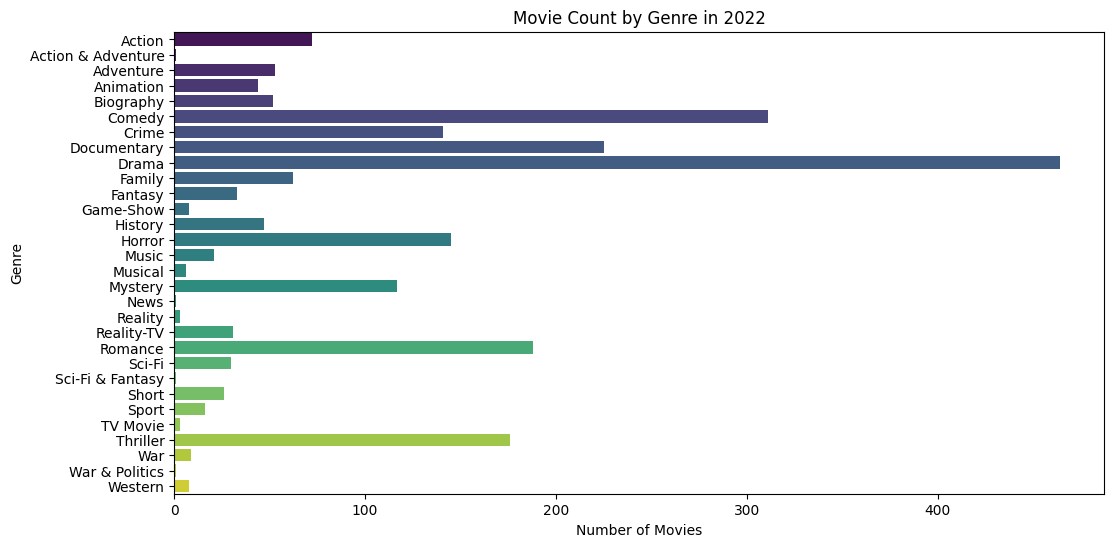

In [40]:
# Select a specific year (e.g., 2022)
year = 2022
df_year = genre_year_counts[genre_year_counts["releaseYear"] == year]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="count", y="genres",hue="genres", data=df_year, palette="viridis")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title(f"Movie Count by Genre in {year}")
plt.show()

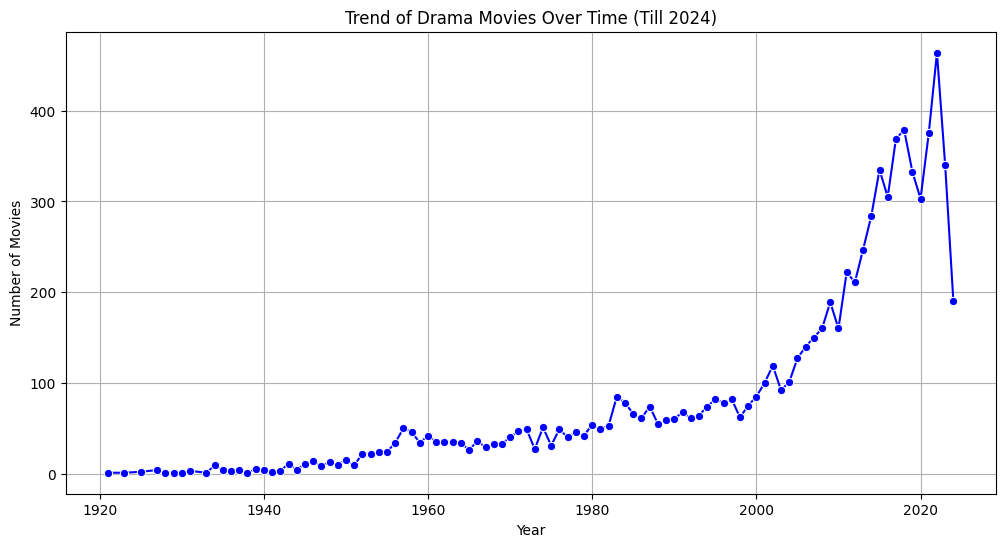

In [47]:
# Select a genre (e.g., "Drama")
genre = "Drama"

# Filter the dataset to include only years up to 2022
data_genre = genre_year_counts[(genre_year_counts["genres"] == genre) & (genre_year_counts["releaseYear"] <= 2024)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="releaseYear", y="count", data=data_genre, marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title(f"Trend of {genre} Movies Over Time (Till 2024)")
plt.grid(True)
plt.show()


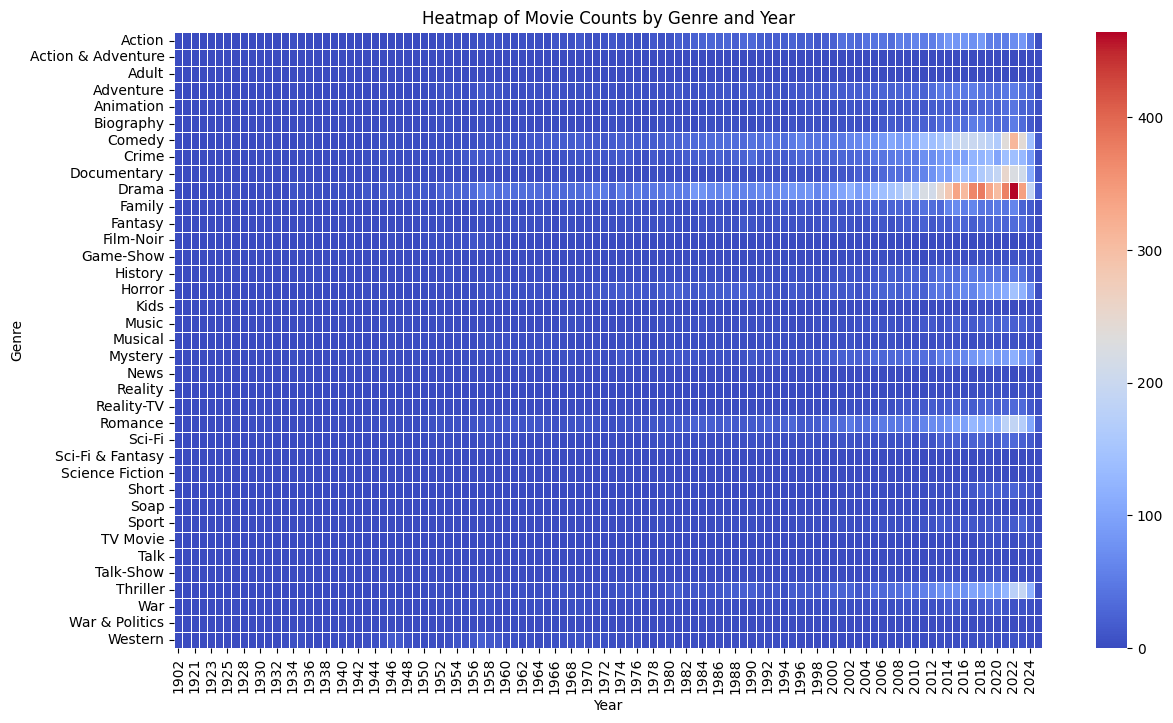

In [45]:
# Pivot the data for heatmap
pivot_data = genre_year_counts.pivot(index="genres", columns="releaseYear", values="count").fillna(0)

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Year")
plt.ylabel("Genre")
plt.title("Heatmap of Movie Counts by Genre and Year")
plt.show()


In [48]:
# Calculate the year-to-year growth for each genre
genre_year_counts["growth"] = genre_year_counts.groupby("genres")["count"].diff()

# Find the year with the highest absolute growth
max_growth_row = genre_year_counts.loc[genre_year_counts["growth"].idxmax()]

# Display the results
peak_year = max_growth_row["releaseYear"]
peak_genre = max_growth_row["genres"]
growth_value = max_growth_row["growth"]

print(f"📈 The highest year-to-year growth was in {peak_year} for the genre '{peak_genre}' with an increase of {int(growth_value)} movies.")

📈 The highest year-to-year growth was in 2022 for the genre 'Drama' with an increase of 89 movies.


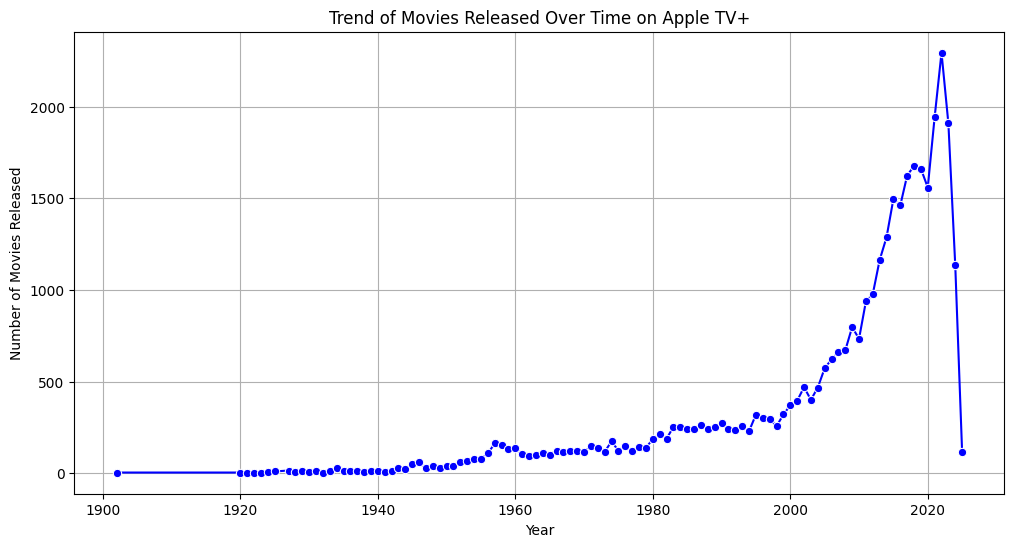

In [49]:
### 📊 1. Trend of Movies Released Over Time ###
yearly_counts = data["releaseYear"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.title("Trend of Movies Released Over Time on Apple TV+")
plt.grid(True)
plt.show()

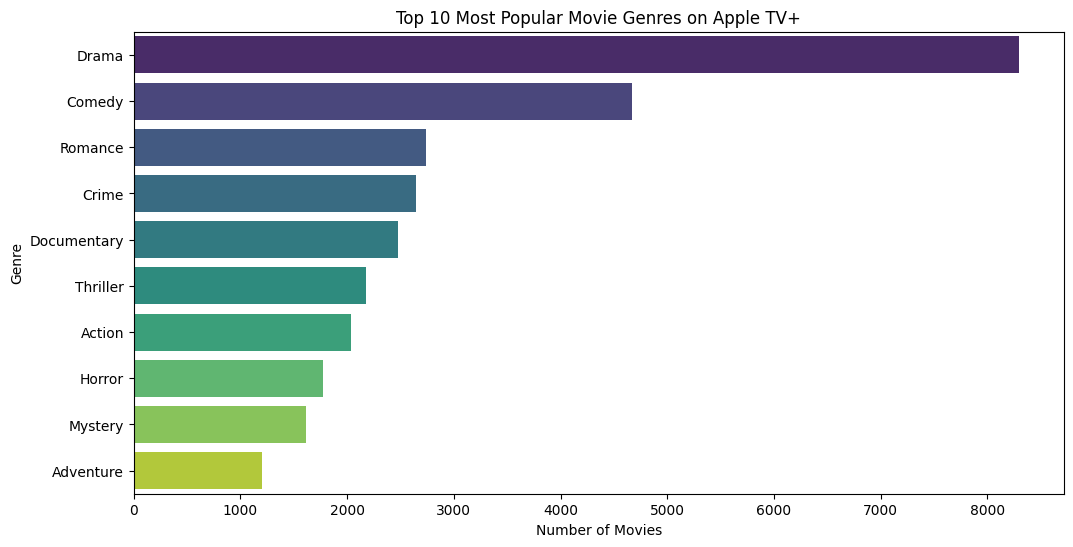

In [51]:
### 🎬 2. Most Popular Genres ###
genre_counts = data["genres"].value_counts().head(10)  # Top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index,hue=genre_counts.index, palette="viridis")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Top 10 Most Popular Movie Genres on Apple TV+")
plt.show()

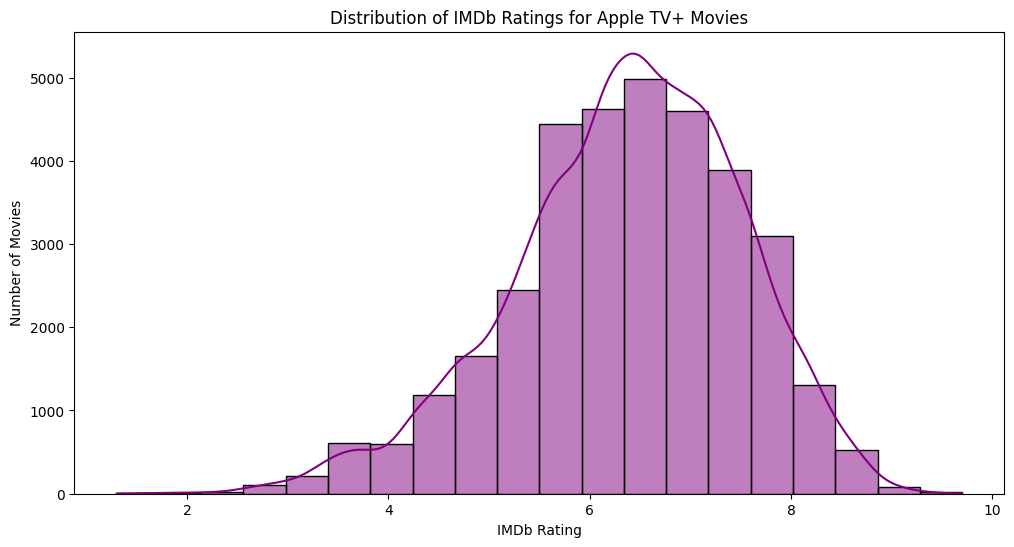

In [52]:

### ⭐ 3. IMDb Ratings Distribution ###
data_ratings = data.dropna(subset=["imdbAverageRating"])  # Drop NaN values in IMDb ratings
plt.figure(figsize=(12, 6))
sns.histplot(data_ratings["imdbAverageRating"], bins=20, kde=True, color="purple")
plt.xlabel("IMDb Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of IMDb Ratings for Apple TV+ Movies")
plt.show()


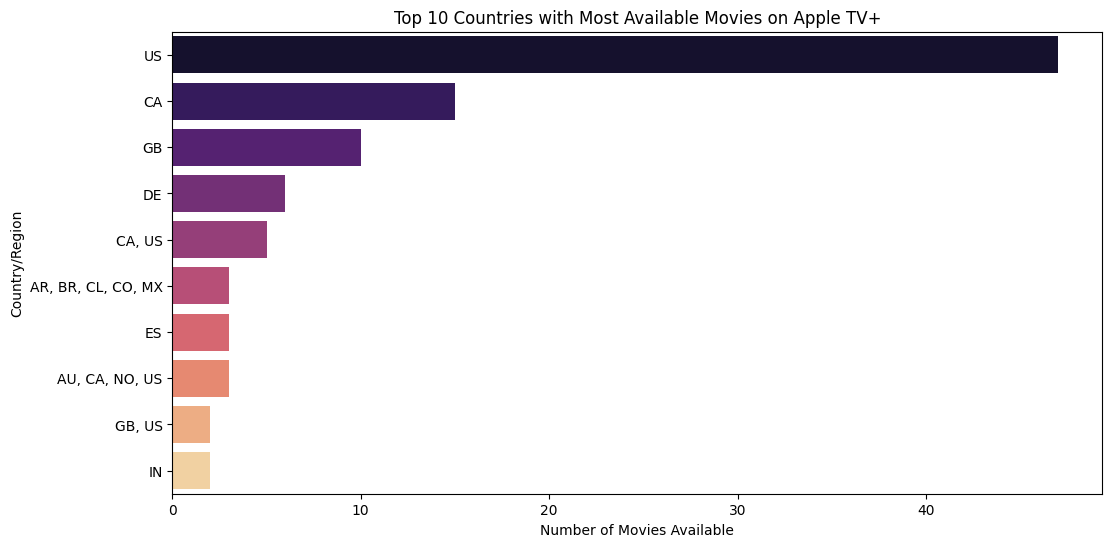

In [54]:
### 🌍 4. Regional Availability (If Data Exists) ###
data_countries = data.dropna(subset=["availableCountries"])  # Drop NaN values in availableCountries
country_counts = data_countries["availableCountries"].value_counts().head(10)  # Top 10 regions

if not country_counts.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=country_counts.values, y=country_counts.index,hue=country_counts.index, palette="magma")
    plt.xlabel("Number of Movies Available")
    plt.ylabel("Country/Region")
    plt.title("Top 10 Countries with Most Available Movies on Apple TV+")
    plt.show()
else:
    print("⚠️ Insufficient data for regional availability analysis.")

1. Clustering (Grouping Similar Movies)

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Reset index to ensure unique indices across the entire DataFrame
data = data.reset_index(drop=True)

# Handle missing values for genres and availableCountries,
# and compute number of genres and available countries
data['num_genres'] = data['genres'].fillna("").str.count(",") + 1
data['num_countries'] = data['availableCountries'].fillna("").str.count(",") + 1

# Select relevant features and drop rows with NaN in these columns
features = data[['imdbAverageRating', 'imdbNumVotes', 'num_genres', 'num_countries']].dropna().copy()

# Save original indices (which are now unique)
orig_index = features.index

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
features['Cluster'] = kmeans.fit_predict(scaled_features)

# Merge clusters back into the original DataFrame using the preserved indices
data.loc[orig_index, 'Cluster'] = features['Cluster']

# Check the clusters
print(data[['title', 'imdbAverageRating', 'Cluster']].head(10))


             title  imdbAverageRating  Cluster
0       Four Rooms                6.7      0.0
1     Forrest Gump                8.8      0.0
2     Forrest Gump                8.8      0.0
3  American Beauty                8.3      0.0
4     Citizen Kane                8.3      0.0
5     Citizen Kane                8.3      0.0
6       Metropolis                8.3      0.0
7       Metropolis                8.3      0.0
8       Unforgiven                8.2      0.0
9       Unforgiven                8.2      0.0


2. Classification (Predicting Movie Popularity)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create target variable (Binary Classification)
data['highly_rated'] = (data['imdbAverageRating'] >= 8).astype(int)

# Feature Selection
X = data[['imdbNumVotes', 'num_genres', 'num_countries']].dropna()
y = data.loc[X.index, 'highly_rated']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.95


3. Regression (Predicting IMDb Rating)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Feature Selection
X = data[['imdbNumVotes', 'num_genres', 'num_countries']].dropna()
y = data.loc[X.index, 'imdbAverageRating']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions
y_pred = reg_model.predict(X_test)

# Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 0.90
